In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [21]:
# Read the preprocessed data
import os

pre_file_path = os.path.join('pre_normalized', 'news.csv')
pre_df = pd.read_csv(pre_file_path)
pre_df = pre_df[["text","label"]]
pre_df

,text,label
0,autor bestseller cita 5 expressoes indicam int...,fake
1,juiz df confirma indicios expresidente petista...,fake
2,senhora 60 anos corre atras eduardo cunha aero...,fake
3,russia ameaca derrubar avioes americanos siria...,fake
4,governo podera demitir 18 mil servidores banco...,fake
...,...,...
7195,petistas intervencao serve contornar dificulda...,true
7196,tercafeira 11 julho 2017 boa noite aqui princi...,true
7197,dona marisa exprimeiradama morre sp mulher lul...,true
7198,thiago blumenthal texto agradecimento nobel li...,true


In [22]:
# Split into fake and true news
fake_df = pre_df[pre_df["label"] == 'fake']
true_df = pre_df[pre_df["label"] == 'true']

In [23]:
# Create bag of words for each df
from sklearn.feature_extraction.text import CountVectorizer

fake_bag = CountVectorizer().fit(fake_df["text"])
true_bag = CountVectorizer().fit(true_df["text"])

In [24]:
fake_bag = fake_bag.vocabulary_
true_bag = true_bag.vocabulary_

In [25]:
# Create a bag of words with the difference between the two

# Get all words from both bags
all_words = set(list(fake_bag.keys()) + list(true_bag.keys()))

bag = {}
for word in all_words:
    if word in fake_bag and word in true_bag:
        bag[word] = true_bag[word] - fake_bag[word]
    elif word in fake_bag:
        bag[word] = -fake_bag[word]
    else:
        bag[word] = true_bag[word]


In [26]:
worst_to_best = sorted(bag.items(), key= lambda x: x[1])
worst_to_best[-1]

('zygmunt', 34125)

In [27]:
len(worst_to_best)

48434

In [28]:
# Number of words in each bag
len(fake_bag), len(true_bag)



(34094, 34126)

In [29]:
numberOfFakeWords = sum(fake_bag.values())
numberOfTrueWords = sum(true_bag.values())
numberOfWords = numberOfFakeWords + numberOfTrueWords
print(numberOfFakeWords / numberOfWords, numberOfTrueWords / numberOfWords)

0.4995309225733916 0.5004690774266084


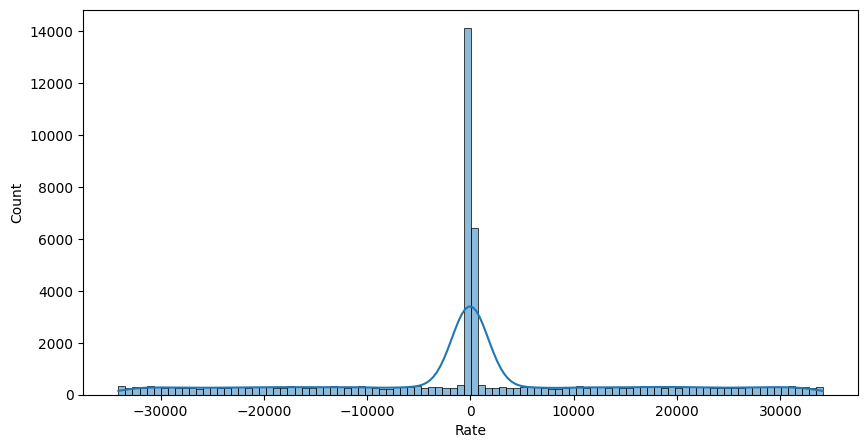

In [30]:
distribution_df = pd.DataFrame(bag.values(), columns=["Rate"])
distribution_df

# Create a histogram of the distribution
plt.figure(figsize=(10,5))
sns.histplot(distribution_df["Rate"], bins=100, kde=True)
plt.show()

In [31]:
normalized_fake_bag = {}
for word in fake_bag:
    normalized_fake_bag[word] = fake_bag[word] / numberOfFakeWords

normalized_true_bag = {}
for word in true_bag:
    normalized_true_bag[word] = true_bag[word] / numberOfTrueWords

normalized_bag = {}
for word in all_words:
    if word in normalized_fake_bag and word in normalized_true_bag:
        normalized_bag[word] = normalized_true_bag[word] - normalized_fake_bag[word]
    elif word in fake_bag:
        normalized_bag[word] = -normalized_fake_bag[word]
    else:
        normalized_bag[word] = normalized_true_bag[word]

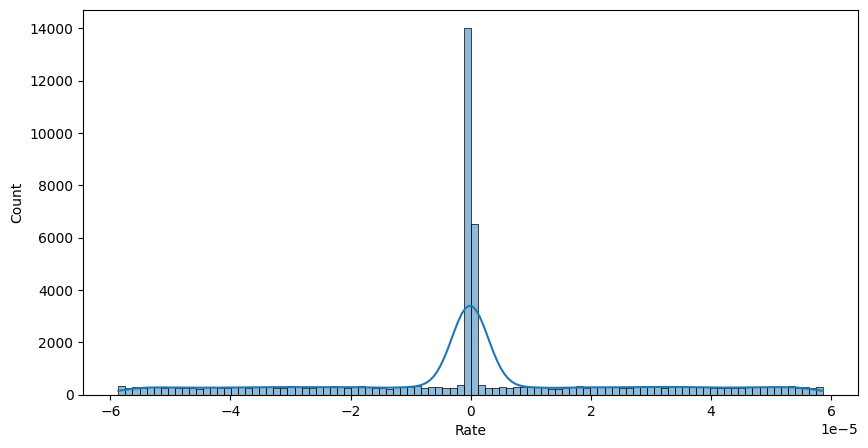

In [32]:
distribution_df = pd.DataFrame(normalized_bag.items(), columns=["Word", "Rate"])
distribution_df

# Create a histogram of the distribution
plt.figure(figsize=(10,5))
sns.histplot(distribution_df["Rate"], bins=100, kde=True)
plt.show()

In [33]:
worst_words_df = distribution_df.loc[distribution_df["Rate"] < -5 * 1e-5]
worst_words_df

,Word,Rate
25,ultrapasse,-0.000056
37,yunnan,-0.000059
45,slides,-0.000052
53,sachin,-0.000050
101,zomba,-0.000059
...,...,...
48299,tcha,-0.000054
48309,trumpolous,-0.000056
48330,suspenderem,-0.000054
48368,submersos,-0.000053


In [34]:
check_worst_word =  worst_words_df["Word"].values

In [35]:
# Check if the words are in the fake news
countFake = 0
for text in fake_df["text"].values:
    for fakeWord in check_worst_word:
        if fakeWord in text:
            countFake += 1


countTrue = 0
for text in true_df["text"].values:
    for fakeWord in check_worst_word:
        if fakeWord in text:
            countTrue += 1

countFake, countTrue


(34232, 31753)

In [36]:
(countFake / numberOfFakeWords, countTrue / numberOfTrueWords) 

(5.890051523858896e-05, 5.4532663804186984e-05)

In [37]:
len(fake_bag.keys()), len(true_bag.keys())

(34094, 34126)

In [38]:
numberOfFakeWords/numberOfTrueWords

0.9981254489127666

In [43]:
best_words_df = distribution_df.loc[distribution_df["Rate"] > 5.7 * 1e-5]
best_words_df

,Word,Rate
437,vespertino,0.000057
912,zinco,0.000059
932,vilarejo,0.000058
1212,viajante,0.000057
1259,vilanova,0.000058
...,...,...
47575,wow,0.000058
47960,vesical,0.000057
47987,wendt,0.000058
48360,vexatoria,0.000057
